<a href="https://colab.research.google.com/github/ziqiveronica/test/blob/main/Another_copy_of_Veronica_Zhao_covidPM_part1_111323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/covidML/covidPM_df_cleaned_111023.csv", index_col=0)

<ipython-input-3-3274d3cf2a7b>:2: DtypeWarning: Columns (1,24,50,81,83,84,114,126,140,182,183,184,191,195,216,217,218,246,248,250,252,261,270,272,276,278,290,294,298,300,302,304,306,308,310,312,314,318,320,324,326,328,330,332,334,336,338) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/covidML/covidPM_df_cleaned_111023.csv", index_col=0)


In [4]:
# COVID_severity_dichot
# Return 1 if the patient did not go to the ICU and survived.
# Return 0 if the patient had severe Covid, critical illness(df['critical.illness']=True, went to the ICU (df['DurationToICU']!=nan), or died ( df['mortality']=True).

def severity(row):
    # Check if the patient went to the ICU (DurationToICU is not NaN) or died (mortality is True)
    if pd.notna(row['DurationToICU']) or row['mortality']:
        return 0
    # Check if the patient had severe COVID or critical illness
    elif row['critical.illness']:
        return 0
    # If none of the above conditions are met, return 1 (did not go to ICU and survived)
    return 1

df['COVID_severity_dichot'] = df.apply(severity, axis=1)
print(df['COVID_severity_dichot'].value_counts())

COVID_severity_dichot
1    7055
0    2790
Name: count, dtype: int64


In [5]:
# ace.arb
def ace(value):
    if pd.notna(value):
        return 1
    else:
        return 0

# Apply the function to the 'ACE.ARB' column
df['ACE.ARB'] = df['ACE.ARB'].apply(ace)

print(df['ACE.ARB'].value_counts())

ACE.ARB
0    9664
1     181
Name: count, dtype: int64


In [6]:
# smoking
data = df['smoking.ever.never']
# Get the value counts for the 'smoking.ever.never' column and calculate the ranks
value_counts = df['smoking.ever.never'].value_counts()
ranks = value_counts.rank(method='first').astype(int)

# Create a dictionary to map each value to its rank
value_to_rank = dict(zip(value_counts.index, ranks))

# Map the 'smoking.ever.never' column to its corresponding rank and save it as a new column 'smoking_ever_never_num'
df['smoking_ever_never_num'] = df['smoking.ever.never'].map(value_to_rank)


print(df['smoking_ever_never_num'].value_counts())

smoking_ever_never_num
2    6796
1    3049
Name: count, dtype: int64


In [7]:
def metformin_dummy(input_string):
    # Check if input_string is a string before checking for 'metformin'
    if isinstance(input_string, str) and 'METFORMIN' in input_string:
        return 1
    else:
        return 0

df['diabetes_rx_num'] = df['Diabetes.RX'].apply(metformin_dummy)
print(df['diabetes_rx_num'].value_counts())

diabetes_rx_num
0    8472
1    1373
Name: count, dtype: int64


In [8]:
# race
race_dummies = pd.get_dummies(df['race.ethnicity'], prefix='race')
df = pd.concat([df, race_dummies], axis=1)
df.drop('race.ethnicity', axis=1, inplace=True)

In [9]:
# @markdown Annotation for the code below:

# @markdown In our data preprocessing for categorical variables, we explored two distinct approaches: ranking and OneHotEncoding. Ranking assigns a numerical order based on frequency of occurrence, which, while computationally efficient and reducing dimensionality, may inadvertently imply an ordinal relationship where none exists. This is particularly problematic for nominal data such as race or ethnicity, as it could introduce biases into the model's learning, assuming an unwarranted hierarchy or scale of importance among categories.

# @markdown Conversely, OneHotEncoding transforms each category into a new binary column, ensuring that the model treats each category as distinct without imposing any ordinality. This method preserves the categorical nature of the data but at the expense of increasing the dimensionality of the dataset, which could be problematic in cases of high cardinality. However, for ensuring accurate model interpretation and preventing the introduction of bias, OneHotEncoding is generally more appropriate and was chosen for handling categorical variables in our analysis. This method aligns with best practices for modeling nominal categories, thereby supporting more reliable and interpretable outcomes from our predictive models.

# # race
# data = df['race.ethnicity']
# # Get the value counts for the 'religion' column and calculate the ranks
# value_counts = df['race.ethnicity'].value_counts()
# ranks = value_counts.rank(method='first').astype(int)

# # Create a dictionary to map each value to its rank
# value_to_rank = dict(zip(value_counts.index, ranks))

# # Map the 'oxygen_device_at_o2_max' column to its corresponding rank and save it as a new column 'oxygen_device_at_o2_max_num'
# df['race_ethnicity_num'] = df['race.ethnicity'].map(value_to_rank)

# print(df['race.ethnicity'].value_counts())
# print(df['race_ethnicity_num'].value_counts())

In [10]:
df = df[['AdmissionAge','Gender', 'BMI', 'smoking_ever_never_num',
            'PM2.5_2019', 'NO2_2019', 'CO_2019',
           'Hyperlipidemia',    'COPD', 'Heart.Failure', 'Coronary.artery.disease','Peripheral.vascular.disease',
            'DIABETES', 'Asthma',
         'Dialysis', 'CKD',   'Hypertension', 'cancer',
         'Cirrhosis', 'OBESITY', 'Autoimmune.Disorders', 'INTERSTITIAL_LUNG_DISEASE', 'EMPHYSEMA',
         'PULMONARY_FIBROSIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA', 'BRONCHIECTASIS', 'ACE.ARB',
         'COVID_severity_dichot'] + list(race_dummies.columns)]

In [11]:
# Transform True/False columns into dummy variables 1/0
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
for col in boolean_cols:
    df[col] = df[col].astype(int)

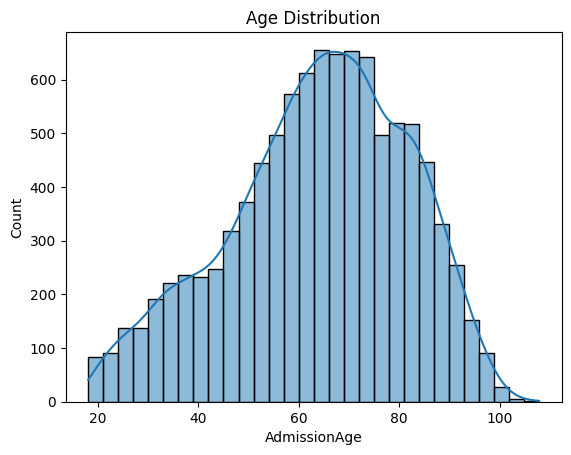

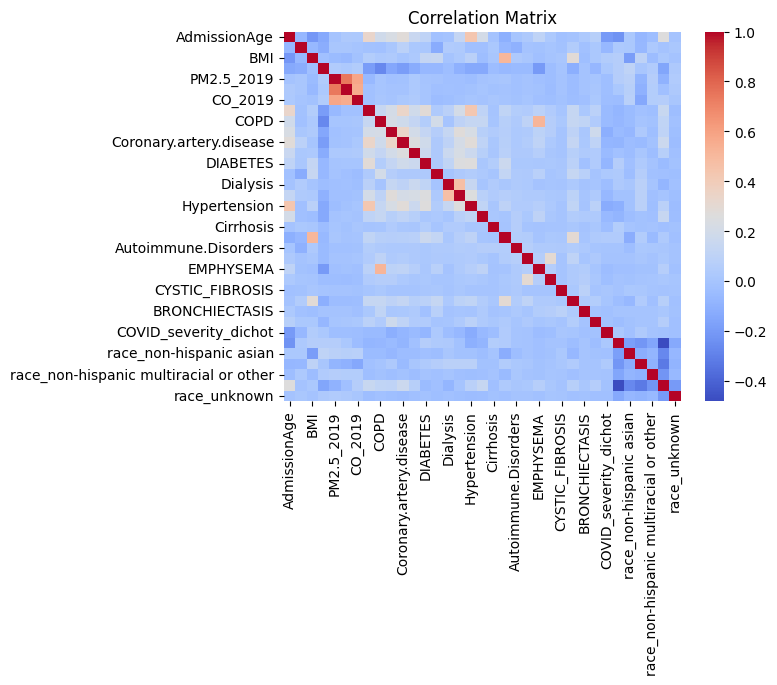

In [14]:
# @markdown Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of a feature
sns.histplot(df['AdmissionAge'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:

# Multivariate Imputation by Chained Equation (MICE) Approach

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df_x = df.drop('COVID_severity_dichot', axis=1)

# Separate numerical and categorical columns
numerical_cols = ['AdmissionAge','BMI', 'PM2.5_2019', 'NO2_2019', 'CO_2019']
categorical_cols = ['Gender', 'smoking_ever_never_num','Hyperlipidemia','COPD', 'Heart.Failure', 'Coronary.artery.disease','Peripheral.vascular.disease',
            'DIABETES', 'Asthma','Dialysis', 'CKD',   'Hypertension', 'cancer',
         'Cirrhosis', 'OBESITY', 'Autoimmune.Disorders', 'INTERSTITIAL_LUNG_DISEASE', 'EMPHYSEMA',
         'PULMONARY_FIBROSIS', 'CYSTIC_FIBROSIS', 'SLEEP_APNEA', 'BRONCHIECTASIS', 'ACE.ARB',
         'COVID_severity_dichot']+ list(race_dummies.columns)

# Numerical DataFrame
df_numerical = df[numerical_cols]

# Categorical DataFrame
df_categorical = df[categorical_cols]

# Create a pipeline for numerical columns (scaling and imputation)
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optionally scale the numerical data
    ('imputer', KNNImputer(n_neighbors=5))  # Use KNN imputer with 5 neighbors (adjust as needed)
])

# Impute and scale numerical data
df_numerical_imputed = numerical_pipeline.fit_transform(df_numerical)

# Convert the scaled and imputed numerical data back to DataFrame
df_numerical_imputed = pd.DataFrame(df_numerical_imputed, columns=df_numerical.columns, index=df_numerical.index)

# Categorical df: Mode imputation
df_categorical_imputed = df_categorical.apply(lambda col: col.fillna(col.mode().iloc[0]))

# Combine the imputed numerical and categorical DataFrames
df_imputed = pd.concat([df_numerical_imputed, df_categorical_imputed], axis=1)

features = [col for col in df_imputed.columns if col != 'COVID_severity_dichot']

# Redefine X and y
X = df_imputed[features]
y = df_imputed['COVID_severity_dichot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# @markdown Handling Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight
import numpy as np


# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights for use in models like Logistic Regression
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
print(class_weights)

{0: 1.7635467980295567, 1: 0.6978557504873294}


In [17]:
# @markdown Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

# Detecting outliers using Local Outlier Factor
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(df_imputed[numerical_cols])
# Filter out the outliers
mask = y_pred != -1
df_cleaned = df[mask]


In [18]:
# @markdown Feature Scaling

# @markdown Now after all the setup steps,
# @markdown - X_train = 'X_train_scaled_df'
# @markdown - X_test = 'X_test_scaled_df'
# @markdown - y_train = 'y_train_resampled'
# @markdown - y_test = 'y_test'

from sklearn.preprocessing import MinMaxScaler

# Scaling features between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Reconstruct DataFrame after scaling
columns = X_train.columns  # Ensure the columns are aligned
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns)

In [19]:
df_processed = pd.concat([X_train_scaled_df, X_test_scaled_df])

# Models Evaluation

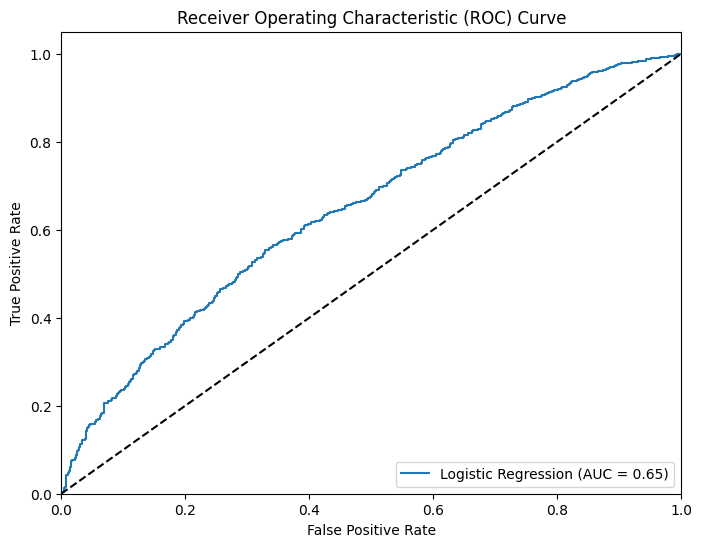

roc_auc_logreg: 0.64875064209825
best_predictor: PULMONARY_FIBROSIS
best_predictor_coefficient: -0.6631


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

log_reg_model = LogisticRegression(max_iter=1000,class_weight=class_weights) # later class_weight=class_weights
log_reg_model.fit(X_train, y_train)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score & plot the ROC curve
roc_auc_logreg = roc_auc_score(y_test, y_prob)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Identify the best predictor of diabetes
coefficients = log_reg_model.coef_[0]
max_coef_index = np.argmax(np.abs(coefficients))
best_predictor = X.columns[max_coef_index]
best_predictor_coefficient = coefficients[max_coef_index]

print("roc_auc_logreg:", roc_auc_logreg)
print("best_predictor:", best_predictor)
print(f"best_predictor_coefficient: {best_predictor_coefficient:.4f}")

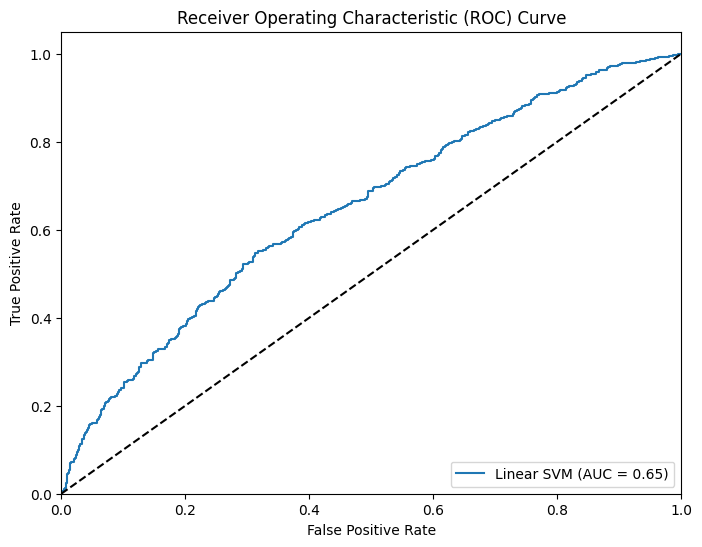

roc_auc_linsvm: 0.648791329512107
best_predictor: AdmissionAge
best_predictor_coefficient: -0.1605278279095976


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Use LinearSVC model with dual=False
svm_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))
svm_model.fit(X_train, y_train)
y_scores = svm_model.decision_function(X_test)

roc_auc_linsvm = roc_auc_score(y_test, y_scores)
fpr_linsvm, tpr_linsvm, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr_linsvm, tpr_linsvm, label='Linear SVM (AUC = %0.2f)' % roc_auc_linsvm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

linear_svc = svm_model.named_steps['linearsvc']

# Identify the best predictor of diabetes
coefficients = linear_svc.coef_[0]
best_predictor_index = abs(coefficients).argmax()
best_predictor = X.columns[best_predictor_index]
best_predictor_coefficient = coefficients[best_predictor_index]

print("roc_auc_linsvm:", roc_auc_linsvm)
print("best_predictor:", best_predictor)
print("best_predictor_coefficient:", best_predictor_coefficient)


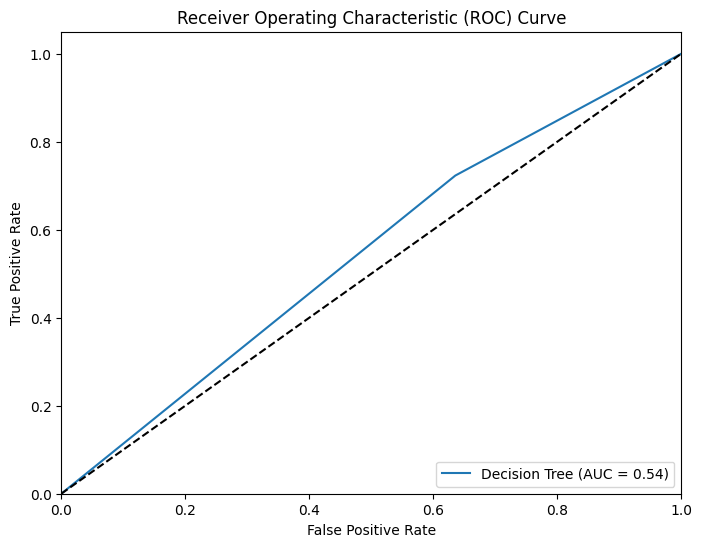

roc_auc_decision_tree: 0.543770121197634
best_predictor: AdmissionAge
best_predictor_coefficient: -0.1605278279095976


In [34]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Calculate the ROC AUC score & plot the ROC curve
y_prob = tree_model.predict_proba(X_test)[:, 1]
roc_auc_decision_tree = roc_auc_score(y_test, y_prob)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get feature importances and identify the best predictor of diabetes
feature_importances = tree_model.feature_importances_

best_predictor_index = feature_importances.argmax()
best_predictor = X.columns[best_predictor_index]
best_predictor_importance = feature_importances[best_predictor_index]

print("roc_auc_decision_tree:", roc_auc_decision_tree)
print("best_predictor:", best_predictor)
print("best_predictor_coefficient:", best_predictor_coefficient)

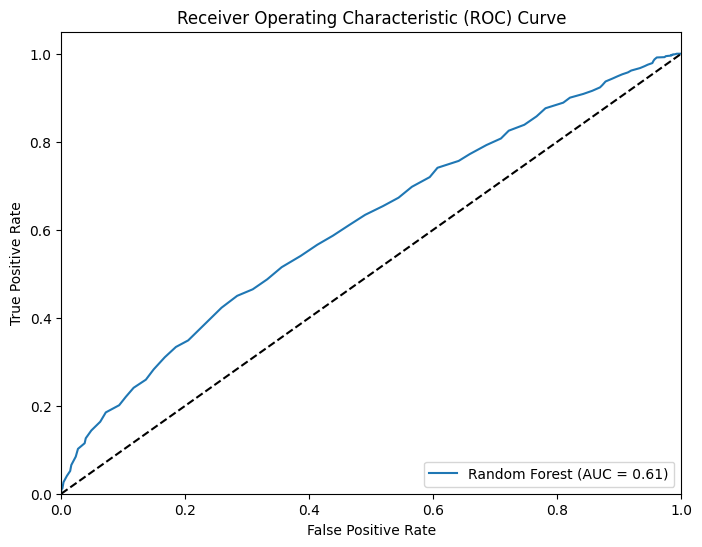

roc_auc_random_forest: 0.6115655245370534
best_predictor: AdmissionAge
best_predictor_coefficient: -0.1605278279095976


In [35]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score & plot the ROC curve
roc_auc_random_forest = roc_auc_score(y_test, y_prob)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get feature importances and identify the best predictor
feature_importances = rf_model.feature_importances_
best_predictor_index = feature_importances.argmax()
best_predictor = X.columns[best_predictor_index]
best_predictor_importance = feature_importances[best_predictor_index]

print("roc_auc_random_forest:", roc_auc_random_forest)
print("best_predictor:", best_predictor)
print("best_predictor_coefficient:", best_predictor_coefficient)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


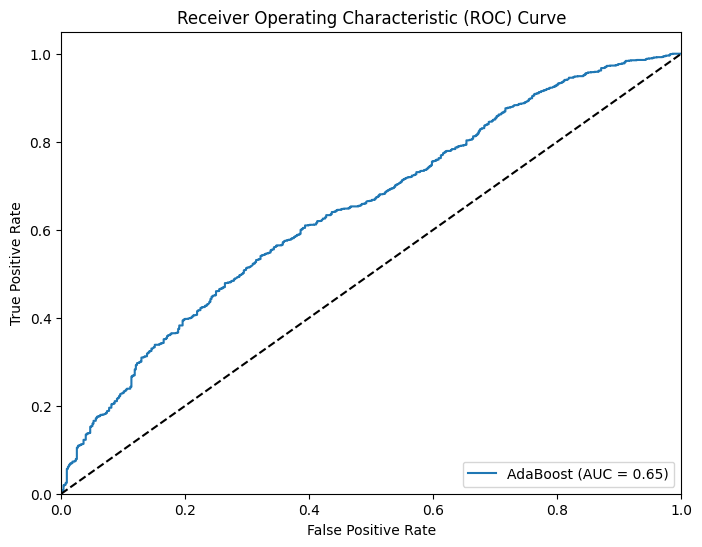

roc_auc_adaboost: 0.6467048280702469
best_predictor: AdmissionAge
best_predictor_coefficient: -0.1605278279095976


In [36]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
ada_model.fit(X_train, y_train)
y_prob = ada_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score & plot the ROC curve
roc_auc_adaboost = roc_auc_score(y_test, y_prob)

fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = %0.2f)' % roc_auc_adaboost)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get feature importances and identify the best predictor
feature_importances = ada_model.feature_importances_
best_predictor_index = feature_importances.argmax()
best_predictor = X.columns[best_predictor_index]
best_predictor_importance = feature_importances[best_predictor_index]

print("roc_auc_adaboost:", roc_auc_adaboost)
print("best_predictor:", best_predictor)
print("best_predictor_coefficient:", best_predictor_coefficient)


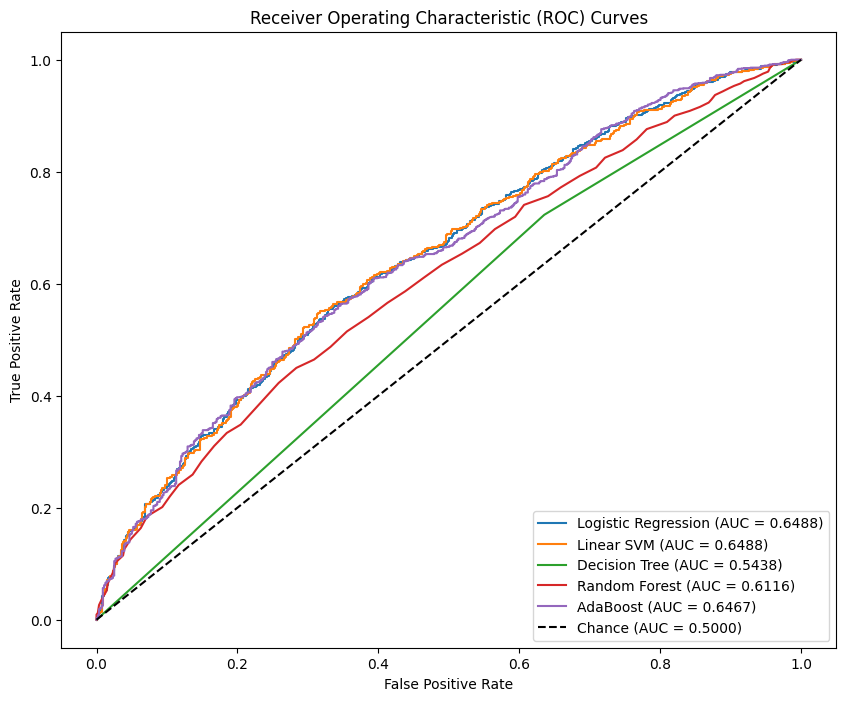

In [37]:
plt.figure(figsize=(10, 8))

# Change %0.2f to %0.4f to better compare roc_auc
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.4f)' % roc_auc_logreg)
plt.plot(fpr_linsvm, tpr_linsvm, label='Linear SVM (AUC = %0.4f)' % roc_auc_linsvm)
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree (AUC = %0.4f)' % roc_auc_decision_tree)
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest (AUC = %0.4f)' % roc_auc_random_forest)
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = %0.4f)' % roc_auc_adaboost)
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5000)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

plt.show()

In [40]:
# import seaborn as sns
# corr = df.corr()
# plt.figure(figsize=(30, 24))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f",
#             linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation Heatmap')
# plt.show()

# Used before

In [21]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

#nn
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin

#lr
import tensorflow as tf
from tensorflow import keras
import statsmodels.api as sm
from matplotlib import pyplot

from sklearn.neighbors import KNeighborsClassifier

#xgb
import xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

In [41]:

rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)
rf_classifier.fit(X_train_scaled_df, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6267140680548502
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.33       557
           1       0.74      0.75      0.74      1412

    accuracy                           0.63      1969
   macro avg       0.54      0.54      0.54      1969
weighted avg       0.62      0.63      0.63      1969



In [44]:

rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)
rf_classifier.fit(X_train_scaled_df, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6267140680548502
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.33      0.33       557
           1       0.74      0.75      0.74      1412

    accuracy                           0.63      1969
   macro avg       0.54      0.54      0.54      1969
weighted avg       0.62      0.63      0.63      1969



In [45]:
# Decision Tree
tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
y_pred_tree = best_tree.predict(X_test)
print(best_params)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [54]:
# Create a Random Forest Classifier with default parameters
best_rf = RandomForestClassifier()

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(X_test)


In [ ]:
# To-do: add Mean decrease accuracy figure + AUC figure

In [46]:
from sklearn.svm import SVC

# Create an SVM Classifier with default parameters
best_svm = SVC()

# Fit the model to the training data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = best_svm.predict(X_test)


In [47]:
# GaussianNB (No Hyper Tuning)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [49]:
# Neural Network
model = Sequential()
from tensorflow.keras.callbacks import EarlyStopping
# Input Layer:
model.add(Dense(64, activation='relu', input_shape=(34,)))

# Dropout Layer:
model.add(Dropout(0.2))
# Hidden Layer:
model.add(Dense(32, activation='relu'))
# Output Layer:
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
y_pred_nn = model.predict(X_test)

Epoch 1/20
197/197 [==============================] - 3s 6ms/step - loss: 0.5980 - accuracy: 0.7063 - val_loss: 0.5681 - val_accuracy: 0.7157
Epoch 2/20
197/197 [==============================] - 1s 4ms/step - loss: 0.5749 - accuracy: 0.7157 - val_loss: 0.5672 - val_accuracy: 0.7170
Epoch 3/20
197/197 [==============================] - 1s 7ms/step - loss: 0.5702 - accuracy: 0.7186 - val_loss: 0.5625 - val_accuracy: 0.7170
Epoch 4/20
197/197 [==============================] - 3s 13ms/step - loss: 0.5657 - accuracy: 0.7179 - val_loss: 0.5645 - val_accuracy: 0.7119
Epoch 5/20
197/197 [==============================] - 1s 6ms/step - loss: 0.5615 - accuracy: 0.7214 - val_loss: 0.5642 - val_accuracy: 0.7069
Epoch 6/20
62/62 [==============================] - 0s 1ms/step


In [50]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr = LogisticRegression(max_iter=1000, solver='liblinear', **best_params)

best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)
print(best_params)

{'C': 0.1, 'penalty': 'l1'}


In [51]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)
print(best_params)

{'n_neighbors': 11, 'p': 3, 'weights': 'uniform'}


In [52]:
# Extreme Gradient Boosting
from xgboost import XGBClassifier

# Create an XGBoost Classifier with default parameters
best_xgb = XGBClassifier()

# Fit the model to your training data
best_xgb.fit(X_train, y_train)

# Make predictions on your test data
y_pred_xgb = best_xgb.predict(X_test)

# Make predictions on your training data
y_train_pred_xgb = best_xgb.predict(X_train)


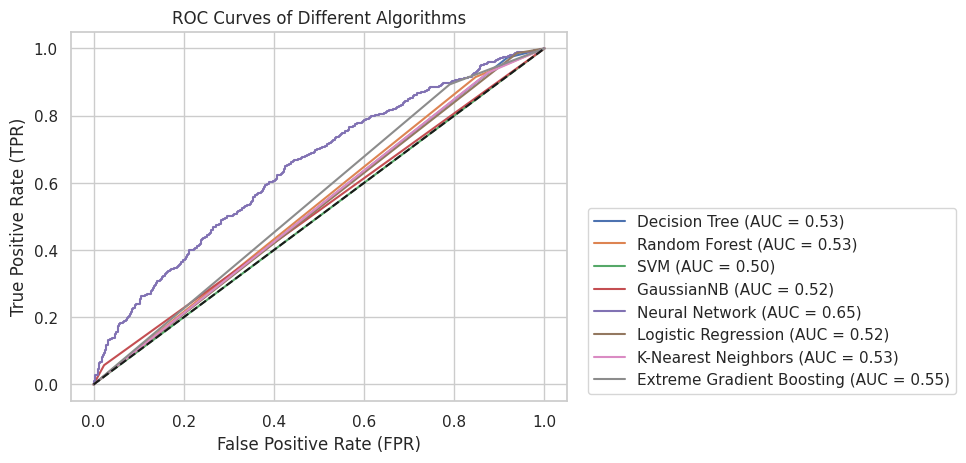

Decision Tree - Accuracy: 0.7207
              precision    recall  f1-score   support

           0       0.54      0.08      0.14       557
           1       0.73      0.97      0.83      1412

    accuracy                           0.72      1969
   macro avg       0.63      0.53      0.49      1969
weighted avg       0.68      0.72      0.64      1969


Random Forest - Accuracy: 0.6993
              precision    recall  f1-score   support

           0       0.41      0.15      0.22       557
           1       0.73      0.92      0.81      1412

    accuracy                           0.70      1969
   macro avg       0.57      0.53      0.52      1969
weighted avg       0.64      0.70      0.65      1969


Support Vector Machine - Accuracy: 0.7171
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       557
           1       0.72      1.00      0.84      1412

    accuracy                           0.72      1969
   macro avg      

In [58]:
fpr_algo1, tpr_algo1, _ = roc_curve(y_test, y_pred_tree)
auc_score_algo1 = auc(fpr_algo1, tpr_algo1)

fpr_algo2, tpr_algo2, _ = roc_curve(y_test, y_pred_rf)
auc_score_algo2 = auc(fpr_algo2, tpr_algo2)

fpr_algo3, tpr_algo3, _ = roc_curve(y_test, y_pred_svm)
auc_score_algo3 = auc(fpr_algo3, tpr_algo3)

fpr_algo4, tpr_algo4, _ = roc_curve(y_test, y_pred_gnb)
auc_score_algo4 = auc(fpr_algo4, tpr_algo4)

fpr_algo5, tpr_algo5, _ = roc_curve(y_test, y_pred_nn[:, 1])
auc_score_algo5 = auc(fpr_algo5, tpr_algo5)

fpr_algo6, tpr_algo6, _ = roc_curve(y_test, y_pred_lr)
auc_score_algo6 = auc(fpr_algo6, tpr_algo6)

fpr_algo7, tpr_algo7, _ = roc_curve(y_test, y_pred_knn)
auc_score_algo7 = auc(fpr_algo7, tpr_algo7)

fpr_algo8, tpr_algo8, _ = roc_curve(y_test, y_pred_xgb)
auc_score_algo8 = auc(fpr_algo8, tpr_algo8)

fpr_algo9, tpr_algo9, _ = roc_curve(y_train, y_train_pred_xgb)
auc_score_algo9 = auc(fpr_algo9, tpr_algo9)

plt.plot(fpr_algo1, tpr_algo1, label='Decision Tree (AUC = %0.2f)' % auc_score_algo1)
plt.plot(fpr_algo2, tpr_algo2, label='Random Forest (AUC = %0.2f)' % auc_score_algo2)
plt.plot(fpr_algo3, tpr_algo3, label='SVM (AUC = %0.2f)' % auc_score_algo3)
plt.plot(fpr_algo4, tpr_algo4, label='GaussianNB (AUC = %0.2f)' % auc_score_algo4)
plt.plot(fpr_algo5, tpr_algo5, label='Neural Network (AUC = %0.2f)' % auc_score_algo5)
plt.plot(fpr_algo6, tpr_algo6, label='Logistic Regression (AUC = %0.2f)' % auc_score_algo6)
plt.plot(fpr_algo7, tpr_algo7, label='K-Nearest Neighbors (AUC = %0.2f)' % auc_score_algo7)
plt.plot(fpr_algo8, tpr_algo8, label='Extreme Gradient Boosting (AUC = %0.2f)' % auc_score_algo8)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves of Different Algorithms')
plt.legend(loc='lower right',bbox_to_anchor=(1.8, 0))

plt.show()


report_model1 = classification_report(y_test, y_pred_tree, zero_division=1)
report_model2 = classification_report(y_test, y_pred_rf, zero_division=1)
report_model3 = classification_report(y_test, y_pred_svm, zero_division=1)
report_model4 = classification_report(y_test, y_pred_gnb, zero_division=1)
report_model6 = classification_report(y_test, y_pred_lr, zero_division=1)
report_model7 = classification_report(y_test, y_pred_knn, zero_division=1)
report_model8 = classification_report(y_test, y_pred_xgb, zero_division=1)

acc_model1 = accuracy_score(y_test, y_pred_tree)
acc_model2 = accuracy_score(y_test, y_pred_rf)
acc_model3 = accuracy_score(y_test, y_pred_svm)
acc_model4 = accuracy_score(y_test, y_pred_gnb)
acc_model6 = accuracy_score(y_test, y_pred_lr)
acc_model7 = accuracy_score(y_test, y_pred_knn)
acc_model8 = accuracy_score(y_test, y_pred_xgb)

y_pred_nn_categorical = np.argmax(y_pred_nn, axis=1)
report_model5 = classification_report(y_test, y_pred_nn_categorical, zero_division=1)
acc_model5 = accuracy_score(y_test, y_pred_nn_categorical)

combined_report = "\n\n".join([
    f"Decision Tree - Accuracy: {acc_model1:.4f}\n{report_model1}",
    f"Random Forest - Accuracy: {acc_model2:.4f}\n{report_model2}",
    f"Support Vector Machine - Accuracy: {acc_model3:.4f}\n{report_model3}",
    f"Gaussian Naive Bayes - Accuracy: {acc_model4:.4f}\n{report_model4}",
    f"Neural Network - Accuracy: {acc_model5:.4f}\n{report_model5}",
    f"Logistic Regression - Accuracy: {acc_model6:.4f}\n{report_model6}",
    f"K-Nearest Neighbors - Accuracy: {acc_model7:.4f}\n{report_model7}",
    f"Extreme Gradient Boosting - Accuracy: {acc_model8:.4f}\n{report_model8}\n"

])

print(combined_report)